In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\EDA\Prakhar.csv")
df.drop_duplicates(inplace = True)
df.reset_index(drop = True,inplace = True)
df.shape

(1337, 7)

In [3]:
for j in df.columns:
    for i in df.index:
        if(df.loc[i,j] == 'yes' or df.loc[i,j] == 'male'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'no' or df.loc[i,j] == 'female'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southwest'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southeast'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'northwest'):
            df.loc[i,j] = 2
        elif(df.loc[i,j] == 'northeast'):
            df.loc[i,j] = 3

In [4]:
df['smoker'] = pd.to_numeric(df['smoker'])
df['sex'] = pd.to_numeric(df['sex'])
df['region'] = pd.to_numeric(df['region'])

In [5]:
Q1 = np.quantile(df['charges'],0.25)
Q3 = np.quantile(df['charges'],0.75)
IQR = Q3 - Q1

for i in df.index:
    if(df.loc[i,'charges'] >= (Q3 + (IQR*1.5)) or df.loc[i,'charges'] < (Q1 - (IQR*1.5))):
        df.drop(i,axis = 0,inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(1198, 7)

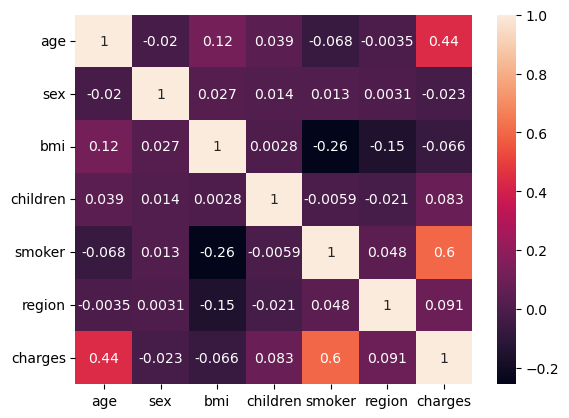

In [6]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [7]:
df.drop(['sex','bmi','children','region'],axis = 1, inplace = True)

In [8]:
df

,age,smoker,charges
0,19,1,16884.92400
1,18,0,1725.55230
2,28,0,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520
...,...,...,...
1193,50,0,10600.54830
1194,18,0,2205.98080
1195,18,0,1629.83350
1196,21,0,2007.94500


In [9]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
model = LinearRegression()

In [12]:
algl = model.fit(x_train,y_train)

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions

array([12380.95174305, 10943.06822054, 11662.00998179, 12620.5989968 ,
       13579.18801181, 11901.65723555, 19519.18057362,  8546.59568301,
        3034.70884671, 10224.12645928,  7108.7121605 , 10703.42096679,
       10703.42096679,  5670.82863799,  3514.00335422,  6869.06490675,
       10943.06822054, 12141.3044893 ,  3274.35610046, 13099.89350431,
       11422.36272804,  7348.35941425,  4472.59236923, 17841.64979735,
       22155.30036489, 26229.30367868,  3274.35610046, 10224.12645928,
       12620.5989968 ,  6389.77039924,  4951.88687673, 25031.06740992,
       12620.5989968 ,  9505.18469802,  8067.30117551, 22874.24212615,
       11422.36272804, 10943.06822054,  7827.65392176,  5670.82863799,
       18320.94430486, 11662.00998179, 11182.71547429,  8306.94842926,
       25031.06740992,  7108.7121605 ,  9744.83195178, 12141.3044893 ,
        6629.417653  ,  3274.35610046, 19279.53331986,  4472.59236923,
        6150.12314549, 11422.36272804,  9505.18469802,  8786.24293677,
      

In [15]:
accuracy = r2_score(y_test,predictions)*100
print(accuracy)

50.040159671575154


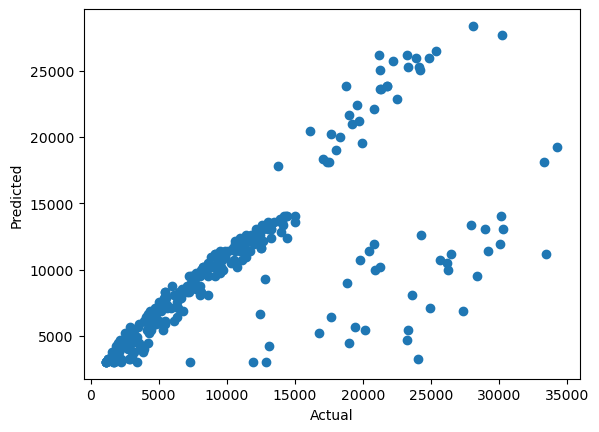

In [16]:
plt.scatter(y_test,predictions);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='charges'>

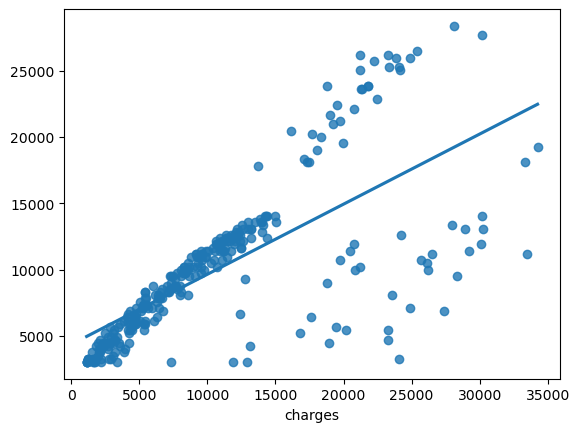

In [17]:
sns.regplot(x = y_test, y = predictions, ci = None)

In [18]:
algl.score(x_test,y_test)

0.5004015967157516

In [19]:
algl.score(x_train,y_train)

0.6237213019333737

In [25]:
mse = mean_squared_error(y_test,predictions)
mse

28704785.514540527

In [26]:
mae = mean_absolute_error(y_test,predictions)
mae

2950.292762770478

In [28]:
mse = np.sum(np.mean((y_test - predictions) ** 2))
mse

28704785.514540527

In [29]:
mae = np.sum(np.mean(abs(y_test - predictions)))
mae

2950.292762770478